#  Movie recommender Systems for users overview.

![Back Grond](https://uploads.toptal.io/blog/image/125351/toptal-blog-image-1517915383695-cfef65b3d04c9f280f5d7f7a50465aeb.png)

## Introduction

In this project, we will build different types of Recommendation Systems for users. This not only gives us an overall view with various types of Recommendation Systems but also helps us choose the appropriate type of Recommendation System for the context.

1. **Demographic Filtering**:
   Starting with the simplest system based on user ratings for each movie, we can then recommend outstanding movies that users rate well and are trending.

2. **Content-Based Filtering**:
   Next is the more complex Recommendation System based on movie content, which allows us to recommend related movies to the ones users are currently watching or interested in.

3. **Collaborative Filtering**:
   Finally, we will build a Recommendation System based on user rating history for movies through the Collaborative Filtering method. Specifically, we will use a different method to address some weaknesses of Collaborative Filtering, which is Matrix Factorization. In this section, you will also be introduced to a new and extremely useful library for Recommendation Systems.


## Pipeline

1. Read the data.

2. Build Recommendation System using Demographic Filtering method.

3. Build Recommendation System using Content-Based Filtering method.

   - Build based on movie overview.
   
   - Build based on movie information including: director, main cast, keywords, movie genre.

4. Build Recommendation System using Collaborative Filtering method with SVD.


## Dataset Explaination

**credits** includes the following features:

- **movie_id**: the id of the movie.
- **cast**: the names of the main and supporting actors.
- **crew**: the names of the crew members involved in the movie production (director, editor, composer, etc.).
- **title**: the title of the movie.

**movies** includes the following features:

- **budget**: the budget for making the movie.
- **genre**: the genres of the movie.
- **homepage**: the link to the movie's homepage.
- **id**: information about the movie_id as in the tmdb_5000_credits dataset.
- **keywords**: keywords or tags related to the movie.
- **original_language**: the language used in the movie.
- **original_title**: the original title of the movie before translation or adaptation.
- **overview**: a brief description of the movie.
- **popularity**: an indication of the movie's popularity.
- **production_companies**: the production companies of the movie.
- **production_countries**: the production countries of the movie.
- **release_date**: the date when it was released.
- **revenue**: the worldwide revenue generated by the movie.
- **runtime**: the duration of the movie in minutes.
- **status**: Released or rumored.
- **tagline**: the tagline of the movie.
- **title**: the title of the movie.
- **vote_average**: the average rating received by the movie.
- **vote_count**: the number of votes.


# Data Processing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Merging two datasets
df_credits = pd.read_csv("credits.csv")
df_movies = pd.read_csv("movies.csv")
df_movies.drop("title", axis=1, inplace=True)
df = pd.concat([df_credits, df_movies], axis=1)
df.shape

(4803, 23)

"literal_eval" is used to safely evaluate an expression node or a string containing a Python literal or container display.



In [10]:
from ast import literal_eval

features = ["cast", "crew", "keywords", "genres"]
for feature in features:
    df[feature] = df[feature].apply(literal_eval)
    
df.shape

(4803, 23)

In [11]:
df[feature]

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4798    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4799    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4801                                                   []
4802                  [{'id': 99, 'name': 'Documentary'}]
Name: genres, Length: 4803, dtype: object

# Demographic Filtering

We can use the average rating as a score, but this is unfair. This unfairness occurs when a movie has an average rating of 8.9 but only with 3 ratings and is not considered better than another movie with an average rating of 7.8 but has 40 ratings. Thus we using IMDB weighted rating as a solution.

The formula for calculating the IMDB weighted rating is given by:

$$
WR = \frac{R \cdot v + C \cdot m}{v + m}
$$

Where:
- \( WR \) is the weighted rating.
- \( R \) is the average rating of the movie or show.
- \( v \) is the number of votes for the movie or show.
- \( m \) is the minimum number of votes required for the movie or show to be considered.
- \( C \) is the mean vote across the entire dataset.

In [14]:
def calculating_weighted_rating(v, m, R, C):
    wr = (v/(v+m))*R + (m/(v + m))*C
    return wr

In [15]:
# Calculating C and m
C = df.vote_average.mean()
m = df["vote_count"].quantile(0.90)
print(f"m : {m}")
print(f"C : {C}")

m : 1838.4000000000015
C : 6.092171559442016


In [16]:
# Filtering the movie has number of vote equal or higher than m
q_movies = df[df["vote_count"] >= m]
q_movies.shape

(481, 23)

In [17]:
v = df.vote_count
R = df.vote_average
# Caculating the score for movies
q_movies["score"] = calculating_weighted_rating(v, m , R, C)

/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_4382/1643863521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies["score"] = calculating_weighted_rating(v, m , R, C)


In [18]:
# Recommending 10 movies based on Demographic Filtering method
q_movies[["title", "vote_count", "vote_average", "score"]].sort_values(by = "score", ascending=False).head(10)
top_10 = q_movies[["title", "vote_count", "vote_average", "score"]].sort_values(by = "score", ascending=False).head(10)
top_10

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


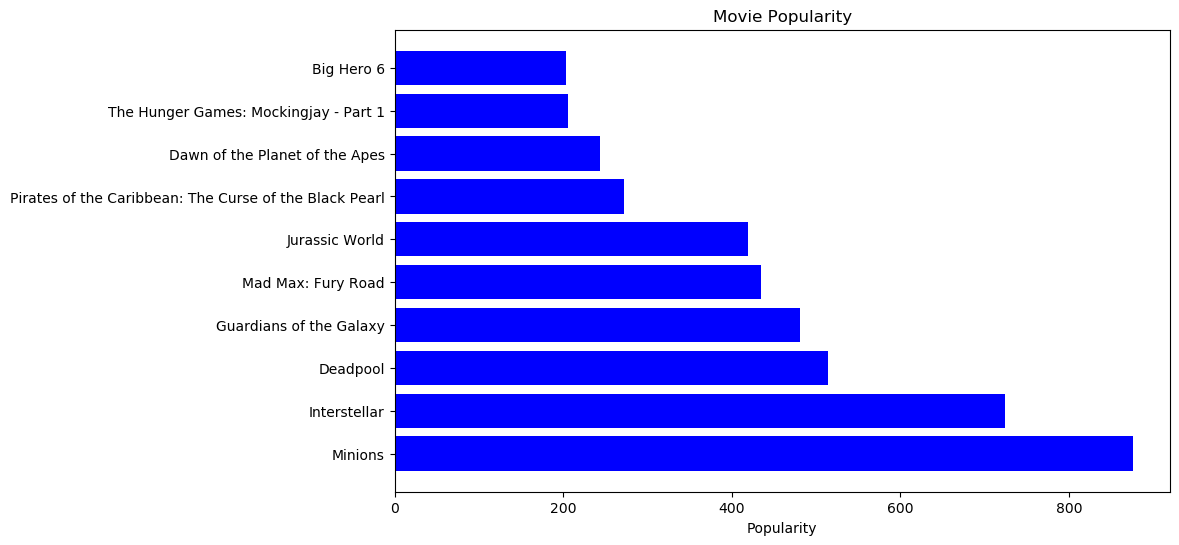

In [19]:
# Displaying the popularity of each movies by histogram
x = q_movies[["title", "popularity"]].sort_values(by = "popularity", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(x["title"], x["popularity"], color="blue")
plt.xlabel("Popularity")
plt.title("Movie Popularity")
plt.show()

# Content Based Filtering

Content-based filtering in movie recommendation systems involves recommending movies to users based on the attributes or features of the movies themselves and the preferences of the users.
<br>Content-based filtering in movie recommendation systems is advantageous because it does not require information about other users' preferences and can provide recommendations for new or niche movies with limited user ratings. However, it may struggle to capture diverse user tastes and recommend movies outside a user's established preferences. Therefore, it is often used in combination with collaborative filtering or hybrid recommendation approaches to improve recommendation accuracy.

<br>In this project, we will calculate the similarity between moviess based on "Overview"

In [22]:
df["overview"].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

First of all, because the **overview** feature is a string, we cannot work with it directly. Therefore, we will use a method called Term Frequency-Inverse Document Frequency (TF-IDF) to compute vectors for each **overview**.

Term Frequency (TF) represents the frequency of a term in a document, while Inverse Document Frequency (IDF) measures the importance of the term.

Formula:

- TF = (number of times term t appears in document d) / (total number of terms in document d)
- IDF(t, D) = log(total number of documents in dataset D / number of documents in dataset D containing term t)

This will give you a matrix where each column represents a term in the overall vocabulary (all terms appearing in at least one document) and each row represents a movie or specifically an overview.


## Recommendation based on similarity between overview

### Calculating IF-IDF for "overview".

In [26]:
# Refill NA by white space
df["overview"] = df["overview"].fillna(" ")

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["overview"])
tfidf_matrix.shape

(4803, 21262)

Euclidean distance measures the straight-line distance between two points in Euclidean space and is calculated as follows:

$$
\text{Similarity}(\mathbf{v}_1, \mathbf{v}_2) = \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\| \mathbf{v}_1 \| \| \mathbf{v}_2 \|}
$$


where V<sub>1</sub> and V<sub>2</sub> are two vectors.

### Computing metrix for "overview"

In [30]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix)     
cosine_sim.shape

(4803, 4803)

In [31]:
def get_recommendations(df, title, cosine_sim=cosine_sim):
    
    # Get the index values through the title
    movie_index = df[df["title"] == title].index.values
    
    # Get similarity values of the specific movie by index
    cosine_scores = cosine_sim[movie_index]
                               
    # Convert similarity scores into DataFrame                          ]
    similarity_df = pd.DataFrame(cosine_scores.T, index= df.index)
    similarity_df.columns = ["similarity"]
                               
    # Sort the DataFrame by similarity scores in descending order                           
    similarity_df = similarity_df["similarity"].sort_values(ascending=False)[1:11]
                               
    # Get top 10 similar movies                           
    top_recommendations = df.loc[similarity_df.index.values]["title"]
                               
    return top_recommendations

### Movie Recommendation

In [33]:
get_recommendations(df, "The Dark Knight Rises")

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
1181                                        JFK
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object

In [34]:
get_recommendations(df, "The Avengers")

7                   Avengers: Age of Ultron
3311                  Thank You for Smoking
4124                     This Thing of Ours
3144                                Plastic
588         Wall Street: Money Never Sleeps
4620                   Fighting Tommy Riley
1892                             The Losers
2433       Superman IV: The Quest for Peace
85      Captain America: The Winter Soldier
580                      Olympus Has Fallen
Name: title, dtype: object

## Creating overview info for movies.



### Creating a director column.

In [37]:
director_set = []
d = []
for i in range(df.shape[0]):
    for j in range(len(df["crew"][i])):
        if df["crew"][i][j]["job"] == "Director": 
            d.append(df["crew"][i][j]["name"])
        else:
            pass
    director_set.append(d[0:3])
    d = []

df["director"] = director_set
df["director"]

0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4798                          [Robert Rodriguez]
4799                              [Edward Burns]
4800                               [Scott Smith]
4801                               [Daniel Hsia]
4802    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: director, Length: 4803, dtype: object

### Creating an actor column.

In [39]:
actor_set = []
ac = []
for i in range(df.shape[0]):
    for j in range(len(df["cast"][i])):
        ac.append(df["cast"][i][j]["name"])
    actor_set.append(ac[0:3])
    ac = []

df["actor"] = actor_set
df["actor"]

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4800           [Eric Mabius, Kristin Booth, Crystal Lowe]
4801            [Daniel Henney, Eliza Coupe, Bill Paxton]
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: actor, Length: 4803, dtype: object

### Creating a keywords column.

In [41]:
keywords_set = []
kw = []
for i in range(df.shape[0]):
    for j in range(len(df["keywords"][i])):
        kw.append(df["keywords"][i][j]["name"])
    keywords_set.append(kw[0:3])
    kw = []
df["keywords"] = keywords_set
df["keywords"]

0               [culture clash, future, space war]
1               [ocean, drug abuse, exotic island]
2              [spy, based on novel, secret agent]
3            [dc comics, crime fighter, terrorist]
4                [based on novel, mars, medallion]
                           ...                    
4798    [united states–mexico barrier, legs, arms]
4799                                            []
4800        [date, love at first sight, narration]
4801                                            []
4802                 [obsession, camcorder, crush]
Name: keywords, Length: 4803, dtype: object

### Creating a genres column.

In [43]:
genres_set = []
ge = []
for i in range(df.shape[0]):
    for j in range(len(df["genres"][i])):
        ge.append(df["genres"][i][j]["name"])
    genres_set.append(ge)
    ge = []
df["genres"] = genres_set
df["genres"]

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

### Creating moview_info column.

In [45]:
df[["title", "actor", "director", "keywords", "genres"]].head(5)

,title,actor,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[culture clash, future, space war]","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama, Thriller]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [46]:
# Replacing spaces with empty strings and converting all characters to lowercase
df["keywords"] = df["keywords"].apply(lambda c: [x.lower().replace(" ","") for x in c])
df["actor"] = df["actor"].apply(lambda c: [x.lower().replace(" ","") for x in c])
df["director"] = df["director"].apply(lambda c: [x.lower().replace(" ","") for x in c])
df["genres"] = df["genres"].apply(lambda c: [x.lower().replace(" ","") for x in c])

# Joining the preprocessed elements into a single string
df["keywords"] = df["keywords"].apply(lambda c: " ".join([str(i) for i in c]))
df["cast"] = df["cast"].apply(lambda c: " ".join([str(i) for i in c]))
df["director"] = df["director"].apply(lambda c: " ".join([str(i) for i in c]))
df["genres"] = df["genres"].apply(lambda c: " ".join([str(i) for i in c]))

# Creating the "movie_info" column by concatenating the preprocessed columns
df["movie_info"] = df["keywords"] + df["cast"] + df["director"] + df["genres"]

In [47]:
df["movie_info"].head()

0    cultureclash future spacewar{'cast_id': 242, '...
1    ocean drugabuse exoticisland{'cast_id': 4, 'ch...
2    spy basedonnovel secretagent{'cast_id': 1, 'ch...
3    dccomics crimefighter terrorist{'cast_id': 2, ...
4    basedonnovel mars medallion{'cast_id': 5, 'cha...
Name: movie_info, dtype: object

## Calculating CountVectorizer for movies

In [49]:
# Vectorization "movie_info" column.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["movie_info"])
vectorizer.get_feature_names_out()

array(['000', '002', '004', ..., '오동춘', '이유진', '최민식'], dtype=object)

Matrix shape: (4803, 4803)


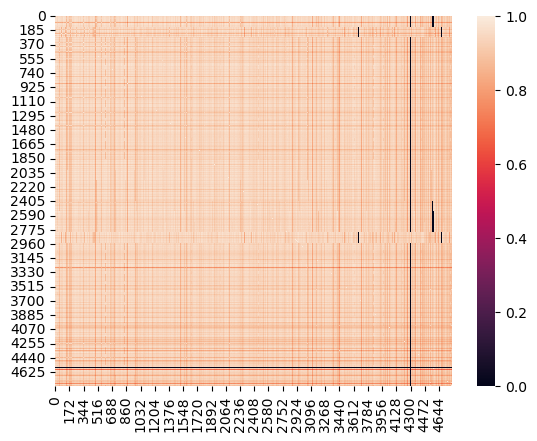

In [50]:
# Similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
cosine_sim2 = cosine_similarity(X)
print(f"Matrix shape: {cosine_sim2.shape}")
sns.heatmap(cosine_sim2)

The intepretation of the matrix is ineffective since the shape is huge. 

## Movie Recommendations 

In [53]:
get_recommendations(df, "The Dark Knight Rises", cosine_sim = cosine_sim2)

65             The Dark Knight
5                 Spider-Man 3
2225             Inherent Vice
281          American Gangster
16                The Avengers
693                  Gone Girl
2105          12 Years a Slave
980     The Life of David Gale
1356              The Hangover
287           Django Unchained
Name: title, dtype: object

In [54]:
get_recommendations(df, "The Godfather", cosine_sim = cosine_sim2)

2731    The Godfather: Part II
281          American Gangster
65             The Dark Knight
1356              The Hangover
287           Django Unchained
2105          12 Years a Slave
2225             Inherent Vice
159                 Spider-Man
980     The Life of David Gale
5                 Spider-Man 3
Name: title, dtype: object

# Collaborative Filtering.

Collaborative filtering is a popular technique used in recommendation systems to provide personalized recommendations to users. It works by leveraging the opinions and preferences of other users to recommend items to a target user. \
<br>There are two main types of collaborative filtering
- User-based collaborative filtering
- Item-based collaborative filtering


## Single Value Decomposition.

Single Value Decomposition (SVD) is a key component of collaborative filtering techniques in recommendation systems. Collaborative filtering aims to recommend items to users based on the preferences and behaviors of similar users or items.


In [57]:
user_rating_df = pd.read_csv("user_ratings.csv")
user_rating_df = user_rating_df.drop("timestamp", axis=1)
user_rating_df

,user_id,movie_id,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [58]:
from surprise import Reader, Dataset, SVD

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_rating_df[['user_id', 'movie_id', 'rating']], reader)

## Using K-Fold and SVD to train and evaluate model.

In [60]:
from surprise.model_selection import KFold
from surprise import accuracy

kf = KFold(n_splits=3)
algo = SVD()


for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)


RMSE: 0.9044
RMSE: 0.9039
RMSE: 0.9007


## Predicting the rating

In [62]:
# Predicting the rating with the user id 6 and moviews id 302
pred = algo.predict(6, 302)
pred

Prediction(uid=6, iid=302, r_ui=None, est=3.28784987005988, details={'was_impossible': False})